# Support Vector Machine

## SVM can be used as a Logistic regression model for linear datasets and also for non-linear datasets

## SVM for Linear dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
data.shape

(50, 5)

In [30]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [31]:
data.State.value_counts()   #nominal feature

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [32]:
data.isnull().sum() #checking if there is any null values OR missing values in the dataframe

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [33]:
#nominal feature :implement one hot encoding to convert categorical data into numeric
#                 There is no mathematical order or relationships between values in the categories
#ordinal feature: implement label encoding to convert this ordinal feature into numeric
#                 There is some mathematical order or relationships between categories

In [34]:
#here state is the categorical column in the data dataframe
#so here we need to use One-hot-encoding on nominal categorical column in the dataFrame
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### converting each values in the dataframe from float to integer values

In [56]:
data['R&D Spend'] = data['R&D Spend'].apply(int)
data['Administration'] = data['Administration'].apply(int)
data['Marketing Spend'] = data['Marketing Spend'].apply(int)
data['Profit'] = data['Profit'].apply(int)

In [57]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349,136897,471784,New York,192261
1,162597,151377,443898,California,191792
2,153441,101145,407934,Florida,191050
3,144372,118671,383199,New York,182901
4,142107,91391,366168,Florida,166187
5,131876,99814,362861,New York,156991
6,134615,147198,127716,California,156122
7,130298,145530,323876,Florida,155752
8,120542,148718,311613,New York,152211
9,123334,108679,304981,California,149759


### One-hot-encoding:nominal categorical column

#### Here we are converting categorical column "column name = state" into integer column and condensing them up

In [58]:
d=pd.get_dummies(data['State'])  #function to create dummy variables

In [59]:
d

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [60]:
### display all numeric cols
#data.iloc[:,:-1].select_dtypes(exclude=['object']) 
# exclude=['object'] integer type columns only will be selected from data (dataFrame)
# here -1 means all the columns will be selected except last column
f=data.iloc[:,:-1].select_dtypes(exclude=['object']) 
f

,R&D Spend,Administration,Marketing Spend
0,165349,136897,471784
1,162597,151377,443898
2,153441,101145,407934
3,144372,118671,383199
4,142107,91391,366168
5,131876,99814,362861
6,134615,147198,127716
7,130298,145530,323876
8,120542,148718,311613
9,123334,108679,304981


### How to concatinate two dataFrames

#### Here we are concatenating f and d dataFrames into one DataFrame

In [61]:
x=pd.concat((f,d),axis=1)
x

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349,136897,471784,0,0,1
1,162597,151377,443898,1,0,0
2,153441,101145,407934,0,1,0
3,144372,118671,383199,0,0,1
4,142107,91391,366168,0,1,0
5,131876,99814,362861,0,0,1
6,134615,147198,127716,1,0,0
7,130298,145530,323876,0,1,0
8,120542,148718,311613,0,0,1
9,123334,108679,304981,1,0,0


In [62]:
y=data['Profit'].values

### splitting dataset into train and test data

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [64]:
# x_train = input_train
# x_test = input_test
# y_train = output_train
# y_test = output_test
x_train,x_test,y_train,y_test = train_test_split(x.values,y,test_size=15,
                                                 random_state=10)

In [65]:
x_test.shape

(15, 6)

### Import SVM and use SVM For Linear dataset

In [66]:
from sklearn.svm import SVC

### Applying HyperParameter tuning on SVC Machine Learning model -> You can apply this HyperParameter method on any Machine Learning model

In [67]:
from sklearn.model_selection import GridSearchCV

In [74]:
#Hyper perameter tuning 
p = [{'kernel': ['linear'], 'C' : [0.01,1,0.1,5,3,0.001]},
     {'kernel': ['rbf'], 'gamma' : [0.01,1,0.1,10,0.001]}]

In [75]:
svm = GridSearchCV(SVC(), param_grid = p, scoring = 'accuracy')

In [76]:
svm.fit(x_train,y_train)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

## Example 2

## SVM Model on Linear seperable dataset

In [77]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [78]:
x,y = make_blobs(n_samples=500,n_features=2,centers=2,cluster_std=2.5,random_state=1)

In [79]:
x.shape

(500, 2)

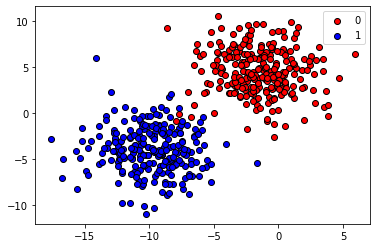

In [80]:
plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k')
plt.legend()
plt.show()

### Applying SVM model

In [81]:
from sklearn.svm import SVC

In [82]:
#gamma=.01,10
clf = SVC(kernel='rbf',gamma=10)  #model assumes that data is non-linear separable
#clf = SVC(kernel='linear')   #model assumes that data is linear separable

In [83]:
clf.fit(x,y)

score = clf.score(x,y)

score

1.0

In [84]:
pred = clf.predict(x)
np.where(pred!=y)

(array([], dtype=int64),)

### Testing SVM model

In [85]:
test = [-6,0.5]

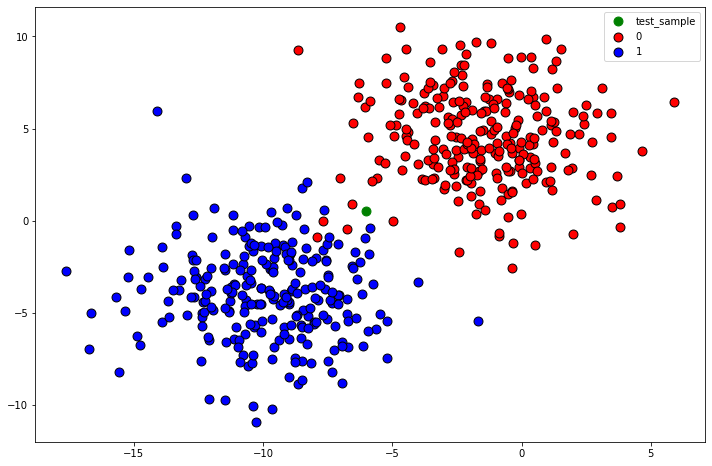

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(test[0],test[1],c='green',label='test_sample',s=80)

plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k',s=80)
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k',s=80)
plt.legend()
plt.show()

In [87]:
clf.predict([test])

array([0])

## SVM model on Non-linear seperable dataset

In [88]:
from sklearn.datasets import make_circles
#to avoid future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [89]:
x1,y1 = make_circles(n_samples=100,random_state=10,noise=.05)

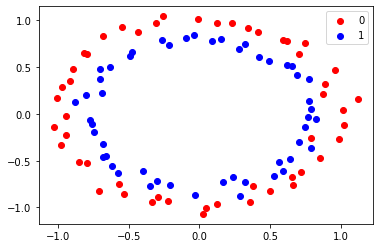

In [90]:
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label='1')
plt.legend()
plt.show()

In [ ]:
# RBF is used to work with non linear dataset

# Gamma is used when we use the RBF kernel. if we use linear kernel then we do not need gamma only we need C hypermeter.

# Gamma is a hyperparameter which we have to set before training model. Gamma decides the the region of a class

# if gamma is low then decision region of a class will be large

# if gamma is high then decision region of a class will be small

In [92]:
clf=SVC(kernel='rbf',gamma=10)

In [93]:
clf.fit(x1,y1)

SVC(gamma=10)

In [94]:
clf.score(x1,y1)

0.97